<a href="https://colab.research.google.com/github/Anastasiya120985/retail-assortment-analysis/blob/main/vkr_project_retail.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ИТОГОВАЯ АТТЕСТАЦИОННАЯ РАБОТА

по дополнительной профессиональной программе
повышения квалификации

**Data-аналитика: Python и SQL в анализе данных**

Выполнила: Ивлева Анастасия Сергеевна

Номер потока: ОФДА-800

Преподаватель: Строев Сергей Павлович

# Анализ товарного ассортимента магазина

## Описание проекта

### Аналитическая задача

Провести анализ товарного ассортимента и определить какие товары входят в основной и дополнительный ассортимент.

Дополнительный ассортимент -- товары, которые можно предлагать как сопутствующие или располагать в прикассовой зоне.

### Описание данных
|Признак | Комментарий|
|--:|:--|
|`date` | дата заказа|
|`customer_id` | идентификатор покупателя|
|`order_id` | идентификатор заказа|
|`product` | наименование товара|
|`quantity` | количество товара в заказе|
|`price` | цена товара|

# 1. Загрузка данных
- Загрузка данных и предварительный анализ

In [1]:
# подключение библиотек
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import datetime as dt

In [2]:
# чтение данных
df = pd.read_csv('/content/vkr_project_retail.csv')

In [3]:
# информация о наборе
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6737 entries, 0 to 6736
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         6737 non-null   int64  
 1   customer_id  6737 non-null   object 
 2   order_id     6737 non-null   int64  
 3   product      6737 non-null   object 
 4   quantity     6737 non-null   int64  
 5   price        6737 non-null   float64
dtypes: float64(1), int64(3), object(2)
memory usage: 315.9+ KB


In [4]:
# проверка пропущенных значений
df.isnull().sum()

,0
date,0
customer_id,0
order_id,0
product,0
quantity,0
price,0


In [5]:
# наименование столбцов
df.columns.tolist()

['date', 'customer_id', 'order_id', 'product', 'quantity', 'price']

**Выводы:**
- Пропуски отсутствуют
- Корректировка заголовков не требуется
- Скорректировать тип данных `date`
- Количественные признаки `quantity` и `price` - анализ аномальных значений







#2. Подготовка данных (при необходимости)
- Корректировка типов признаков;
- Поиск и обработка дублей;
- Добавление новых столбцов;
- Поиск и обработка аномальных значений.


In [6]:
# корректировка типов данных -- date:
df['date'] = pd.to_datetime(df['date'], format="%Y%m%d%H")

In [7]:
# поиск и обработка дублирующихся записей
int(df.duplicated().sum())

0

In [8]:
# добавление новых столбцов:

# общая выручка по каждому товару
df['revenue'] = df['quantity'] * df['price']

# день заказа
df['date_order'] = df['date'].dt.date

# месяц заказа
df['month_order'] = df['date'].dt.strftime("%Y-%m")

In [9]:
# статистика количественных признаков -- 'quantity', 'price'
per = [0.01, 0.05, 0.25, 0.5, 0.75, 0.95, 0.99]
lst_columns = ['quantity', 'price']
df[lst_columns].describe(percentiles=per)

,quantity,price
count,6737.000000,6737.000000
mean,2.501559,462.028499
std,15.266478,871.296064
min,1.000000,9.000000
1%,1.000000,15.000000
5%,1.000000,38.000000
25%,1.000000,101.000000
50%,1.000000,135.000000
75%,1.000000,398.000000
95%,6.000000,1949.000000


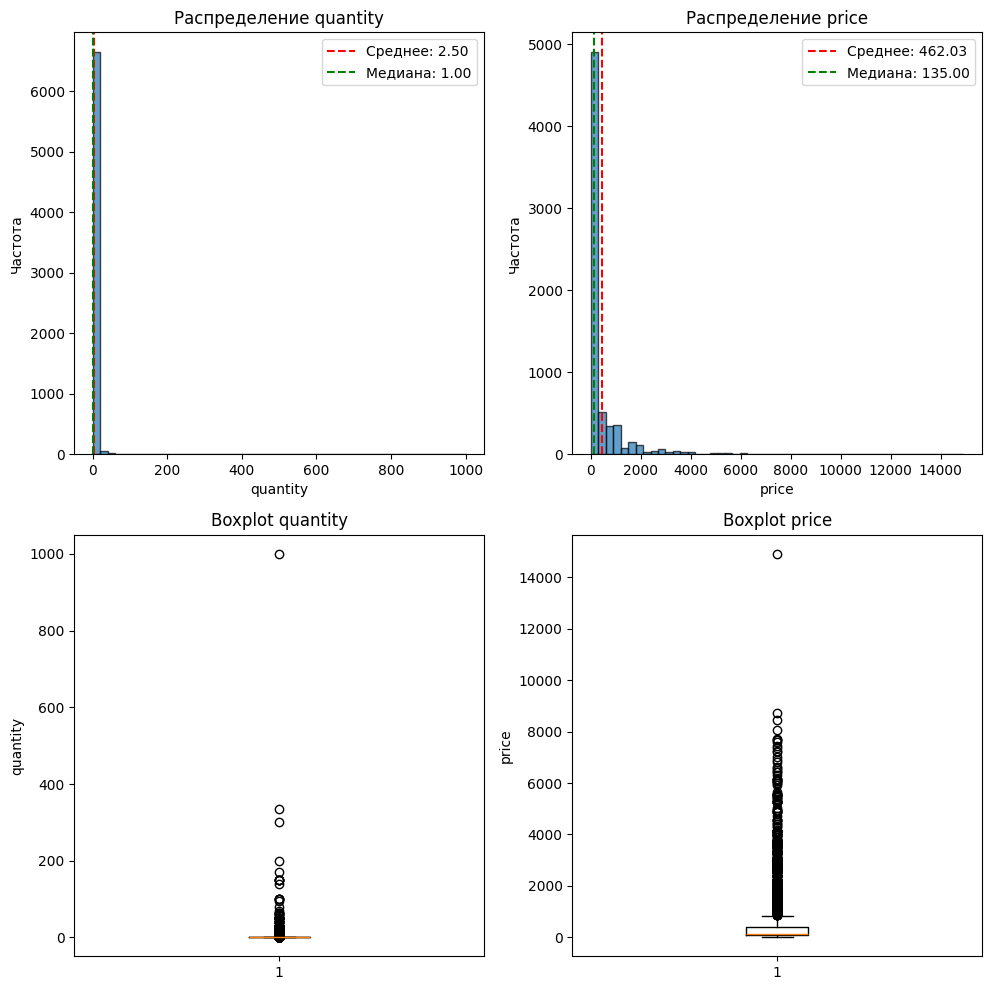

<Figure size 640x480 with 0 Axes>

In [10]:
# визуализация
plt.figure(figsize=(15, 10))

# Гистограммы распределений
for i, col in enumerate(lst_columns, 1):
    plt.subplot(2, 3, i)
    plt.hist(df[col], bins=50, alpha=0.7, edgecolor='black')
    plt.title(f'Распределение {col}')
    plt.xlabel(col)
    plt.ylabel('Частота')

    # Добавляем вертикальные линии для среднего и медианы
    plt.axvline(df[col].mean(), color='red', linestyle='--', label=f'Среднее: {df[col].mean():.2f}')
    plt.axvline(df[col].median(), color='green', linestyle='--', label=f'Медиана: {df[col].median():.2f}')
    plt.legend()

# Boxplots
for i, col in enumerate(lst_columns, 4):
    plt.subplot(2, 3, i)
    plt.boxplot(df[col])
    plt.title(f'Boxplot {col}')
    plt.ylabel(col)

plt.tight_layout()
plt.show()
plt.savefig('anomalies.png')

In [11]:
# Количество заказов с аномальными значениями
high_quantity_orders = df[df['quantity'] >= 200]['order_id'].unique()
high_price_orders = df[df['price'] >= 8000]['order_id'].unique()

print(f"Заказы с quantity >= 200: {len(high_quantity_orders)}")

print(f"Заказы с price >= 8000: {len(high_price_orders)}")

Заказы с quantity >= 200: 4
Заказы с price >= 8000: 4


In [12]:
# Товары с аномальными значениями

high_quantity_products = df[df['quantity'] >= 200]['product'].value_counts()
print(f"""Товары с quantity >= 200:
{high_quantity_products.head()}
      """)

high_price_products = df[df['price'] >= 8000]['product'].value_counts()
print(f"""Товары с price >= 8000:
{high_price_products.head()}""")

Товары с quantity >= 200:
product
Ручка-скоба РС-100 белая *Трибатрон*, 1108035                        1
Муляж ЯБЛОКО 9 см красное                                            1
Вешалки мягкие для деликатных вещей 3 шт шоколад                     1
Вантуз с деревянной ручкой d14 см красный, Burstenmann, 0522/0000    1
Name: count, dtype: int64
      
Товары с price >= 8000:
product
Сумка-тележка хозяйственная Andersen Alu Star Shopper, Hava, синяя 115-103-90    1
Сумка-тележка хозяйственная Andersen Royal Shopper, Hera, синяя 166-004-90       1
Сумка-тележка хозяйственная Rolser MNB019 rojo LOGIC DOS+2 красная               1
Сушилка уличная Leifheit 85210 LINOMATIC V 400 40 м 175х237х237 см зеленая       1
Name: count, dtype: int64


# Выводы:
- Дубли отсутствуют
- Добавлены новые столбцы:
|Признак | Комментарий|
|--:|:--|
|`revenue` | выручка по каждому товару|
|`date_order` | день заказа|
|`month_order` | месяц заказа|
- Аномалии представляют реальные бизнес-кейсы (оптовые закупки, премиальные товары) -> не удаляем
- Необходимо использовать сегментацию товара для раздельного анализа

#3. Исследовательский анализ данных
- Построить диаграмму количества покупок по месяцам;
- Построить диаграмму, отображающую сумму покупок по месяцам;
- Построить гистограмму, отображающую распределение заказов по сумме.

In [13]:
# Создание датафрейма с агрегацией по заказам
orders_df = df.groupby('order_id').agg({
    'date': 'first',
    'customer_id': 'first',
    'revenue': 'sum',
    'quantity': 'sum',
    'product': 'count'
}).reset_index()

orders_df.columns = ['order_id', 'date', 'customer_id', 'order_revenue', 'total_quantity', 'product_count']
orders_df['month_order'] = orders_df['date'].dt.strftime("%Y-%m")

In [14]:
# Информация о данных
print(f"""Период данных: с {df['date'].min()} по {df['date'].max()}
Общее количество уникальных товаров: {df['product'].nunique()}
Общее количество заказов: {df['order_id'].nunique()}
Общее количество клиентов: {df['customer_id'].nunique()}
Общая выручка: {df['revenue'].sum():,.2f} руб.
Средний чек: {orders_df['order_revenue'].mean():.2f} руб.
Медианный чек: {orders_df['order_revenue'].median():.2f} руб.""")

Период данных: с 2018-10-01 00:00:00 по 2019-10-31 16:00:00
Общее количество уникальных товаров: 2343
Общее количество заказов: 2784
Общее количество клиентов: 2451
Общая выручка: 4,851,280.00 руб.
Средний чек: 1742.56 руб.
Медианный чек: 734.00 руб.


In [15]:
# Количество покупок по месяцам
monthly_orders = orders_df.groupby('month_order').agg({
    'order_id': 'count',
    'order_revenue': 'sum',
    'customer_id': 'nunique'
}).reset_index()

monthly_orders.columns = ['month_order', 'order_count', 'total_revenue', 'unique_customers']

monthly_orders

,month_order,order_count,total_revenue,unique_customers
0,2018-10,239,423594.0,180
1,2018-11,204,368704.0,178
2,2018-12,284,445756.0,233
3,2019-01,166,263587.0,150
4,2019-02,285,341641.0,243
5,2019-03,247,308782.0,232
6,2019-04,267,450038.0,238
7,2019-05,181,409729.0,167
8,2019-06,161,933838.0,152
9,2019-07,198,277748.0,186


/tmp/ipython-input-1925248635.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=75,


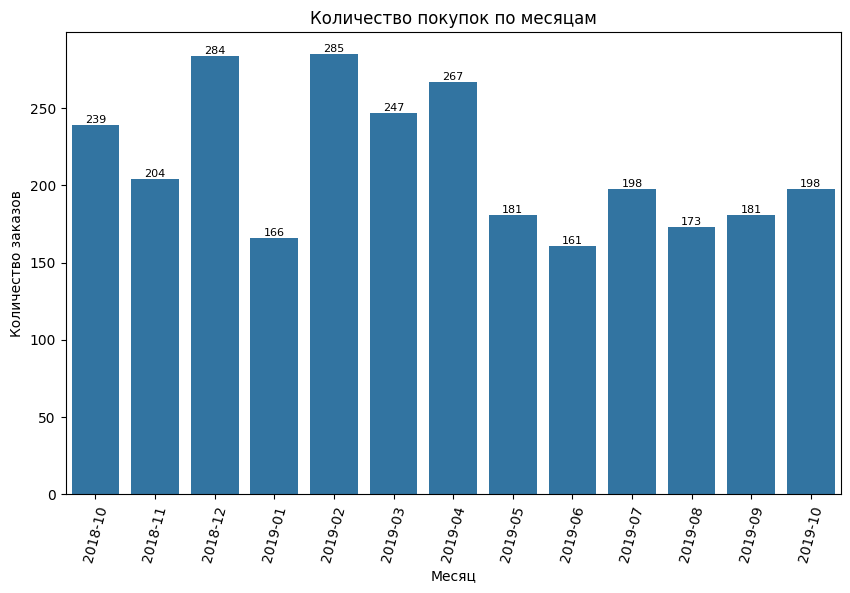

In [16]:
# Построение диаграммы -- количество покупок по месяцам
plt.figure(figsize=(10, 6))

ax = sns.barplot(data=monthly_orders,
                 x='month_order',
                 y='order_count')
ax.set_xlabel("Месяц")
ax.set_ylabel("Количество заказов")
ax.set_title("Количество покупок по месяцам",
             fontdict={'fontsize': 12, 'color': 'black'})
ax.set_xticklabels(ax.get_xticklabels(), rotation=75,
                   fontdict={'fontsize': 10, 'color': 'black'});
ax.bar_label(ax.containers[0], fontsize=8);

plt.savefig('number_purchases_month.png')

# Выводы по диаграмме количества покупок по месяцам:
- **Пик активности**: декабрь 2018 (284) и февраль 2019 (285). Вероятно, связаны с праздничными сезонами.
- **Минимальные месяцы**: июнь 2019 (161) и январь 2019 (166). Характерно для постпраздничного спада.
- **Сезонность**: заметный подъём в декабре и феврале, спад в январе и летние месяцы.


/tmp/ipython-input-3705259810.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=75,


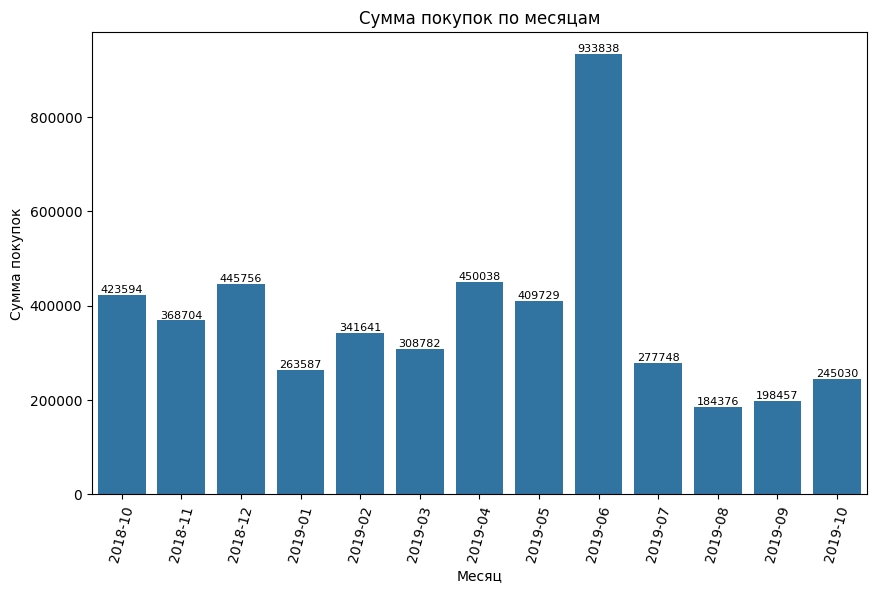

In [17]:
# Сумма покупок по месяцам
plt.figure(figsize=(10,6))

ax = sns.barplot(data=monthly_orders,
                 x='month_order',
                 y='total_revenue')
ax.set_xlabel("Месяц")
ax.set_ylabel("Сумма покупок")
ax.set_title("Сумма покупок по месяцам",
             fontdict={'fontsize': 12, 'color': 'black'})
ax.set_xticklabels(ax.get_xticklabels(), rotation=75,
                   fontdict={'fontsize': 10, 'color': 'black'});
ax.bar_label(ax.containers[0], fontsize=8);

plt.savefig('amount_purchases_month.png')

# Выводы по диаграмме сумма покупок по месяцам:
- **Рекордный пик** в июне 2019 — выручка достигла 933,838, что более чем в 2 раза выше средних значений предыдущих месяцев.
- **Резкое падение** после пика — с июля 2019 началось устойчивое снижение, и последние 4 месяца показывают самые низкие результаты за весь период.
- **Выраженная сезонность** — традиционно сильные месяцы в конце года (октябрь-декабрь) и выраженные спады в январе, марте и летние месяцы.

In [18]:
order_revenue_stats = orders_df['order_revenue'].describe()
print(f"""Статистики распределения сумм заказов:
Минимум: {order_revenue_stats['min']:.2f} руб.
Максимум: {order_revenue_stats['max']:.2f} руб.
Среднее: {order_revenue_stats['mean']:.2f} руб.
Медиана: {order_revenue_stats['50%']:.2f} руб.
Стандартное отклонение: {order_revenue_stats['std']:.2f} руб.""")

quantiles = orders_df['order_revenue'].quantile([0.25, 0.5, 0.75, 0.9, 0.95, 0.99])
print("\nКвантили распределения:")
for q, value in quantiles.items():
    print(f"{q*100}%: {value:.2f} руб.")

Статистики распределения сумм заказов:
Минимум: 14.00 руб.
Максимум: 675000.00 руб.
Среднее: 1742.56 руб.
Медиана: 734.00 руб.
Стандартное отклонение: 13308.29 руб.

Квантили распределения:
25.0%: 300.00 руб.
50.0%: 734.00 руб.
75.0%: 1612.75 руб.
90.0%: 3240.10 руб.
95.0%: 4849.55 руб.
99.0%: 11275.50 руб.


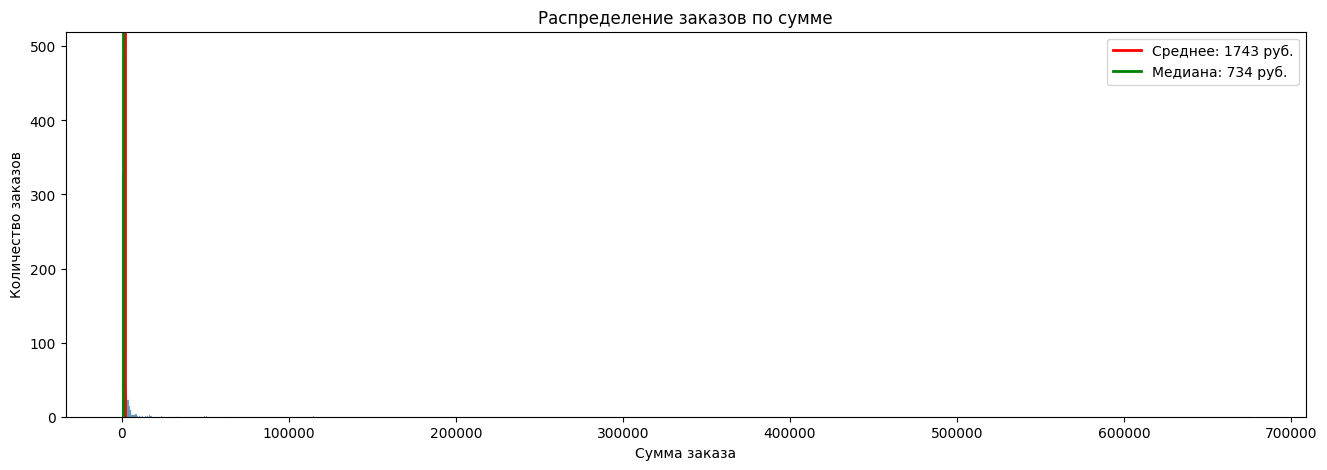

<Figure size 640x480 with 0 Axes>

In [19]:
# Гистограмма распределения заказов по сумме
plt.figure(figsize=(16,5))

ax = sns.histplot(orders_df['order_revenue'], alpha=0.6)
ax.set_xlabel("Сумма заказа")
ax.set_ylabel("Количество заказов")
ax.set_title("Распределение заказов по сумме",
             fontdict={'fontsize': 12, 'color': 'black'})

# Добавление вертикальных линий для среднего и медианы
ax.axvline(orders_df['order_revenue'].mean(), color='red',
           linewidth=2, label=f'Среднее: {orders_df["order_revenue"].mean():.0f} руб.')
ax.axvline(orders_df['order_revenue'].median(), color='green',
           linewidth=2, label=f'Медиана: {orders_df["order_revenue"].median():.0f} руб.')

plt.legend()
plt.show()
plt.savefig('distribution_orders_amount.png')

# Выводы по распределению заказов по сумме:
   - Распределение сильно скошено вправо (правый хвост)
   - Большинство заказов имеют небольшую сумму
   - Присутствуют заказы с экстремально высокими суммами
   - Медиана значительно ниже среднего - типично для данных о продажах

#4. Анализ торгового асортимента
- На основании наименования товара и данных открытых внешних источников предложить 3-10 категорий товаров;
- В каждой категории распределить товары на основной и дополнительный ассортимент.

In [20]:
# словарь для категорий
dct_catalog = {'Растения и цветы': ['растение', 'герань', 'пеларгония', 'роза', 'фиалка', 'хризантема',
                                    'эвкалипт', 'суккулент', 'калатея', 'мирт', 'азалия', 'гортензия',
                                    'глоксиния', 'цикламен', 'бегония', 'примула', 'каланхое', 'антуриум',
                                    'рассада', 'мелисса', 'розмарин', 'лаванда', 'тимьян', 'базилик',
                                    'петрушка', 'кориандр', 'душица', 'шалфей', 'мята', 'иссоп', 'сантолина'],
               'Хозяйственные товары для уборки': ['сушилка', 'вешалка', 'прищепк', 'таз', 'корзин', 'коврик',
                                                   'щетка', 'веник', 'швабра', 'совок', 'ведро', 'ерш', 'контейнер',
                                                   'мусорный', 'урна', 'перчатк', 'салфетка', 'тряпк', 'средство'],
               'Товары для кухни': ['сковород', 'кастрюл', 'ковш', 'ноже', 'ложка', 'вилка', 'терка',
                                    'толкушка', 'разделочн', 'миска', 'кувшин', 'чайник', 'сковород',
                                    'противень', 'емкость', 'банка', 'салатник', 'тарелка', 'кружка',
                                    'стакан', 'бокал', 'фужер', 'масленка', 'салфетница'],
               'Гладильное оборудование': ['гладильн', 'утюг', 'доска', 'чехол', 'подкладк', 'подрукавник'],
               'Товары для ванной комнаты': ['ванн', 'душ', 'штор', 'коврик', 'полотенц', 'зубн', 'мыло',
                                             'шампунь', 'гель', 'пена', 'ерш унитаз', 'сиденье', 'держатель'],
               'Декор и интерьер': ['муляж', 'искусственн', 'цветок', 'букет', 'композиция', 'плед',
                                    'скатерть', 'карниз', 'подголовник', 'ковер', 'светильник', 'ваза'],
               'Хранение и организация': ['сумка', 'тележка', 'чемодан', 'кофр', 'короб', 'ящик', 'чехол',
                                          'вешалка', 'плечик', 'организац', 'хранен'],
               'Сад и огород': ['сад', 'огород', 'горшок', 'кашпо', 'лопат', 'грабл', 'лейк']}

def category_product(product_name, dct_catalog):
    for category, lst_key_words in dct_catalog.items():
        for word in lst_key_words:
            if word in product_name.lower():
                return category
    return 'Прочие товары'

In [21]:
# Применение категоризации
df['product_category'] = df['product'].apply(category_product, args=(dct_catalog,))

# Анализ результатов категоризации
category_stats = df.groupby('product_category').agg({
    'product': 'nunique',
    'quantity': 'sum',
    'revenue': 'sum',
    'order_id': 'nunique'
}).round(2)

category_stats.columns = ['unique_products', 'total_quantity', 'total_revenue', 'order_count']
category_stats = category_stats.sort_values('total_revenue', ascending=False)

category_stats

,unique_products,total_quantity,total_revenue,order_count
product_category,,,,
Прочие товары,663,4981,1468249.0,541
Хозяйственные товары для уборки,401,2535,916939.0,632
Хранение и организация,127,733,908693.0,353
Растения и цветы,512,3831,521759.0,610
Гладильное оборудование,142,375,398556.0,235
Товары для ванной комнаты,117,729,205508.0,164
Товары для кухни,193,969,202043.0,187
Декор и интерьер,154,2631,198390.0,220
Сад и огород,34,69,31143.0,28


In [22]:
# ABC-анализ по выручке
def abc_analysis_revenue(df, category):
    category_data = df[df['product_category'] == category]
    product_revenue = category_data.groupby('product')['revenue'].sum().sort_values(ascending=False)
    total_revenue = product_revenue.sum()
    product_revenue_percentage = (product_revenue / total_revenue) * 100
    cumulative_percentage = product_revenue_percentage.cumsum()

    # Классификация ABC
    abc_class = []
    for value in cumulative_percentage:
        if value <= 80:
            abc_class.append('A')
        elif value <= 95:
            abc_class.append('B')
        else:
            abc_class.append('C')

    abc_df = pd.DataFrame({
        'Product': product_revenue.index,
        'Revenue': product_revenue.values,
        'Percentage': product_revenue_percentage.values,
        'CumulativePercentage': cumulative_percentage.values,
        'ABC_Class': abc_class
    })
    return abc_df

# ABC-анализ по количеству продаж
def abc_analysis_quantity(df, category):
    category_data = df[df['product_category'] == category]
    product_quantity = category_data.groupby('product')['quantity'].sum().sort_values(ascending=False)
    total_quantity = product_quantity.sum()
    product_quantity_percentage = (product_quantity / total_quantity) * 100
    cumulative_percentage = product_quantity_percentage.cumsum()

    # Классификация ABC
    abc_class = []
    for value in cumulative_percentage:
        if value <= 80:
            abc_class.append('A')
        elif value <= 95:
            abc_class.append('B')
        else:
            abc_class.append('C')

    abc_df = pd.DataFrame({
        'Product': product_quantity.index,
        'Quantity': product_quantity.values,
        'Percentage': product_quantity_percentage.values,
        'CumulativePercentage': cumulative_percentage.values,
        'ABC_Class': abc_class
    })
    return abc_df

# Применяем ABC-анализ для каждой категории
categories = df['product_category'].unique()
abc_results = {}

for category in categories:
    abc_revenue = abc_analysis_revenue(df, category)
    abc_quantity = abc_analysis_quantity(df, category)

    # Объединяем результаты по выручке и количеству
    merged_abc = pd.merge(abc_revenue, abc_quantity, on='Product', suffixes=('_Revenue', '_Quantity'))

    # Определяем итоговый класс (берем худший из двух)
    merged_abc['Final_Class'] = merged_abc[['ABC_Class_Revenue', 'ABC_Class_Quantity']].max(axis=1)

    abc_results[category] = merged_abc

# Определяем основной и дополнительный ассортимент
# Основной: классы A и B, Дополнительный: класс C
for category in categories:
    abc_df = abc_results[category]
    main_assortment = abc_df[abc_df['Final_Class'].isin(['A', 'B'])]
    additional_assortment = abc_df[abc_df['Final_Class'] == 'C']

    print(f"""--- {category} ---
    Основной ассортимент: {len(main_assortment)} товаров
    Дополнительный ассортимент: {len(additional_assortment)} товаров\n""")

    # Сохраняем результаты
    abc_results[category]['Assortment_Type'] = abc_results[category]['Final_Class'].apply(
        lambda x: 'Основной' if x in ['A', 'B'] else 'Дополнительный'
    )

--- Растения и цветы ---
    Основной ассортимент: 279 товаров
    Дополнительный ассортимент: 233 товаров

--- Прочие товары ---
    Основной ассортимент: 179 товаров
    Дополнительный ассортимент: 484 товаров

--- Хозяйственные товары для уборки ---
    Основной ассортимент: 212 товаров
    Дополнительный ассортимент: 189 товаров

--- Гладильное оборудование ---
    Основной ассортимент: 96 товаров
    Дополнительный ассортимент: 46 товаров

--- Товары для кухни ---
    Основной ассортимент: 98 товаров
    Дополнительный ассортимент: 95 товаров

--- Хранение и организация ---
    Основной ассортимент: 59 товаров
    Дополнительный ассортимент: 68 товаров

--- Декор и интерьер ---
    Основной ассортимент: 48 товаров
    Дополнительный ассортимент: 106 товаров

--- Товары для ванной комнаты ---
    Основной ассортимент: 48 товаров
    Дополнительный ассортимент: 69 товаров

--- Сад и огород ---
    Основной ассортимент: 22 товаров
    Дополнительный ассортимент: 12 товаров



<Figure size 1600x1000 with 0 Axes>

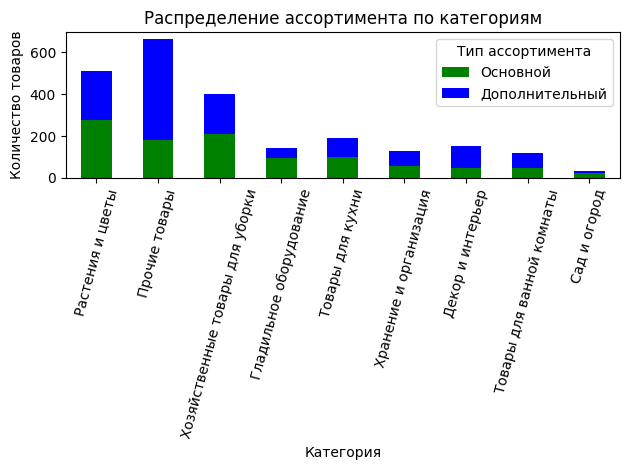

<Figure size 640x480 with 0 Axes>

In [23]:
# Визуализация распределения ассортимента по категориям
assortment_summary = []
for category in categories:
    abc_df = abc_results[category]
    main_count = len(abc_df[abc_df['Assortment_Type'] == 'Основной'])
    additional_count = len(abc_df[abc_df['Assortment_Type'] == 'Дополнительный'])
    assortment_summary.append({
        'Category': category,
        'Основной': main_count,
        'Дополнительный': additional_count
    })

assortment_df = pd.DataFrame(assortment_summary)
assortment_df.set_index('Category', inplace=True)

# Строим stacked bar chart
plt.figure(figsize=(16, 10))
assortment_df.plot(kind='bar', stacked=True, color=['green', 'blue'])
plt.title('Распределение ассортимента по категориям')
plt.xlabel('Категория')
plt.ylabel('Количество товаров')
plt.xticks(rotation=75)
plt.legend(title='Тип ассортимента')
plt.tight_layout()
plt.show()
plt.savefig('distribution_assortment_category.png')

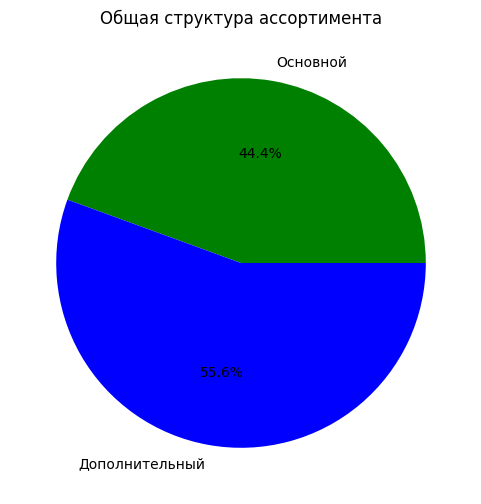

<Figure size 640x480 with 0 Axes>

In [24]:
# Круговая диаграмма для общей структуры ассортимента
total_main = sum([len(abc_results[cat][abc_results[cat]['Assortment_Type'] == 'Основной']) for cat in categories])
total_additional = sum([len(abc_results[cat][abc_results[cat]['Assortment_Type'] == 'Дополнительный']) for cat in categories])

plt.figure(figsize=(6, 6))
plt.pie([total_main, total_additional],
        labels=['Основной', 'Дополнительный'],
        autopct='%1.1f%%',
        colors=['green', 'blue'])
plt.title('Общая структура ассортимента')
plt.show()
plt.savefig('general_structure_assortment.png')

# Выводы:
- По наименованию товара выделено 9 категорий товара.
- Использован ABC-анализ по двум параметрам (выручка и количество продаж) для более объективной оценки.
- Критерии разделения:
  *   Основной ассортимент: Товары классов A и B (80% выручки/продаж)
  *   Дополнительный ассортимент: Товары класса C (оставшиеся 20%)
- Результат - анализ показывает распределение товаров по категориям и их вклад в общую выручку.